In [1]:
#count number of image types
import os
import numpy as np

root_dir = os.getcwd()
total_covid_files = 0
total_normal_files = 0
total_pneumonia_files = 0

for base, dirs, files in os.walk(root_dir + '/COVID'):
    for Files in files:
        total_covid_files += 1
        
for base, dirs, files in os.walk(root_dir + '/Normal'):
    for Files in files:
        total_normal_files += 1

for base, dirs, files in os.walk(root_dir + '/Viral Pneumonia'):
    for Files in files:
        total_pneumonia_files += 1


In [39]:
#establish root, training and validation directories for image types
all_covid_dir = os.path.join(root_dir, 'COVID')
all_normal_dir = os.path.join(root_dir, 'Normal')
all_pneumonia_dir = os.path.join(root_dir, 'Viral Pneumonia')

train_dir = os.path.join(root_dir, 'train_imgs')
valid_dir = os.path.join(root_dir, 'valid_imgs')

train_covid_dir = os.path.join(train_dir, 'COVID')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')
valid_covid_dir = os.path.join(valid_dir, 'COVID')
valid_normal_dir = os.path.join(valid_dir, 'Normal')
valid_pneumonia_dir = os.path.join(valid_dir, 'Viral Pneumonia')
finalize_model_dir = os.path.join(root_dir, 'finalize_model_dir')
finalize_binary_dir = os.path.join(root_dir, 'finalize_binary_dir')


binary_dir = os.path.join(root_dir, 'binary_classification')
binary_train_dir = os.path.join(binary_dir, 'train_imgs')
binary_valid_dir = os.path.join(binary_dir, 'valid_imgs')
binary_covid_train_dir = os.path.join(binary_train_dir, 'COVID')
binary_non_covid_train_dir = os.path.join(binary_train_dir, 'Non-COVID')
binary_covid_valid_dir = os.path.join(binary_valid_dir, 'COVID')
binary_non_covid_valid_dir = os.path.join(binary_valid_dir, 'Non-COVID')


In [3]:
#sample images of each type to be split into training and validation sets
sample_size = 1000
train_ratio = 0.8

training_size = int(sample_size*train_ratio)
valid_size = sample_size - training_size

covid_train = list(np.random.choice(range(total_covid_files), sample_size, replace=False))
normal_train = list(np.random.choice(range(total_normal_files), sample_size, replace=False))
pneumonia_train = list(np.random.choice(range(total_pneumonia_files), sample_size, replace=False))
covid_valid = []
normal_valid = []
pneumonia_valid = []

for i in range(valid_size):
    covid_index = np.random.choice(covid_train)
    normal_index = np.random.choice(normal_train)
    pneumonia_index = np.random.choice(pneumonia_train)
    
    covid_valid.append(covid_index)
    covid_train.remove(covid_index)
    normal_valid.append(normal_index)
    normal_train.remove(normal_index)
    pneumonia_valid.append(pneumonia_index)
    pneumonia_train.remove(pneumonia_index)

from shutil import copy

for index in covid_train:
    filename = all_covid_dir + '\COVID-' + str(index+1) + '.png'
    copy(filename, train_covid_dir)
    
for index in covid_valid:
    filename = all_covid_dir + '\COVID-' + str(index+1) + '.png'
    copy(filename, valid_covid_dir)
    
for index in normal_train:
    filename = all_normal_dir + '\\Normal-' + str(index+1) + '.png'
    copy(filename, train_normal_dir)
    
for index in normal_valid:
    filename = all_normal_dir + '\\Normal-' + str(index+1) + '.png'
    copy(filename, valid_normal_dir)
    
for index in pneumonia_train:
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(index+1) + '.png'
    copy(filename, train_pneumonia_dir)
    
for index in pneumonia_valid:
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(index+1) + '.png'
    copy(filename, valid_pneumonia_dir)

    

In [6]:
# Image pre-processing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='categorical')

# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        valid_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='categorical')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [5]:
# Binary CNN classifier using VGG model blocks

import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


def build_CNN():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(299, 299, 3)))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dense(3, activation='softmax'))
    cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return cnn

test_model = build_CNN()
test_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0

In [101]:
# fit the model
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,  # 2000 images = batch_size * steps
#       epochs=15,
#       validation_data=validation_generator,
#       validation_steps=50,  # 1000 images = batch_size * steps
#       verbose=2)

history = test_model.fit_generator(
    train_generator, 
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator, 
    validation_steps=len(validation_generator), 
    epochs=20, 
    verbose=2)

Epoch 1/20
38/38 - 290s - loss: 4.2412 - accuracy: 0.6562 - val_loss: 0.3820 - val_accuracy: 0.8350
Epoch 2/20
38/38 - 278s - loss: 0.3275 - accuracy: 0.8763 - val_loss: 0.3193 - val_accuracy: 0.8867
Epoch 3/20
38/38 - 277s - loss: 0.2185 - accuracy: 0.9192 - val_loss: 0.2991 - val_accuracy: 0.8950
Epoch 4/20
38/38 - 284s - loss: 0.1474 - accuracy: 0.9446 - val_loss: 0.2724 - val_accuracy: 0.8983
Epoch 5/20
38/38 - 277s - loss: 0.0958 - accuracy: 0.9650 - val_loss: 0.3216 - val_accuracy: 0.8900
Epoch 6/20
38/38 - 280s - loss: 0.0686 - accuracy: 0.9771 - val_loss: 0.3405 - val_accuracy: 0.8967
Epoch 7/20
38/38 - 277s - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.3682 - val_accuracy: 0.9083
Epoch 8/20
38/38 - 278s - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.3816 - val_accuracy: 0.9067
Epoch 9/20
38/38 - 274s - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.3641 - val_accuracy: 0.9150
Epoch 10/20
38/38 - 279s - loss: 0.0076 - accuracy: 0.9996 - val_loss: 0.5369 - val_accuracy: 0.8933

Text(0.5, 1.0, 'Training and validation loss')

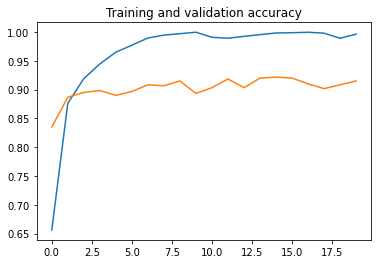

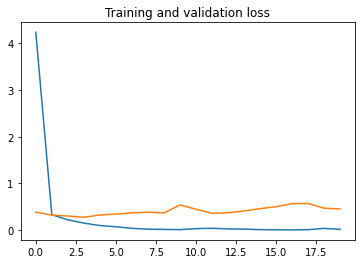

In [103]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [8]:
# attempting to decrease validation loss with dropout regularization techniques
from keras.layers import Dropout

def build_dropout_CNN():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(299, 299, 3)))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(3, activation='softmax'))
    cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return cnn

dropout_model = build_dropout_CNN()

dropout_history = dropout_model.fit_generator(
    train_generator, 
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator, 
    validation_steps=len(validation_generator), 
    epochs=20, 
    verbose=2)

Epoch 1/20
38/38 - 322s - loss: 9.4416 - accuracy: 0.3921 - val_loss: 1.0400 - val_accuracy: 0.5450
Epoch 2/20
38/38 - 314s - loss: 0.8823 - accuracy: 0.5879 - val_loss: 0.8037 - val_accuracy: 0.7117
Epoch 3/20
38/38 - 337s - loss: 0.6877 - accuracy: 0.7042 - val_loss: 0.5733 - val_accuracy: 0.8133
Epoch 4/20
38/38 - 330s - loss: 0.5721 - accuracy: 0.7692 - val_loss: 0.4780 - val_accuracy: 0.8367
Epoch 5/20
38/38 - 323s - loss: 0.4735 - accuracy: 0.8042 - val_loss: 0.4615 - val_accuracy: 0.8367
Epoch 6/20
38/38 - 318s - loss: 0.4272 - accuracy: 0.8367 - val_loss: 0.4159 - val_accuracy: 0.8667
Epoch 7/20
38/38 - 324s - loss: 0.3890 - accuracy: 0.8567 - val_loss: 0.4528 - val_accuracy: 0.8417
Epoch 8/20
38/38 - 320s - loss: 0.3535 - accuracy: 0.8625 - val_loss: 0.4112 - val_accuracy: 0.8650
Epoch 9/20
38/38 - 314s - loss: 0.3332 - accuracy: 0.8733 - val_loss: 0.3895 - val_accuracy: 0.8583
Epoch 10/20
38/38 - 310s - loss: 0.2861 - accuracy: 0.8938 - val_loss: 0.5001 - val_accuracy: 0.8367

Text(0.5, 1.0, 'Training and validation loss')

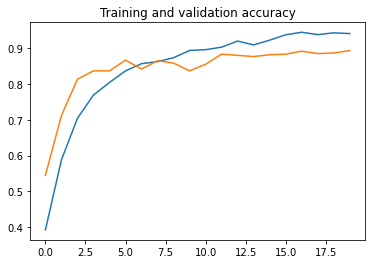

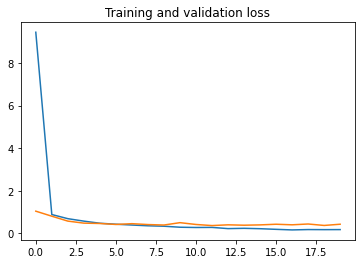

In [11]:
import matplotlib.pylab as plt

dropout_acc = dropout_history.history['accuracy']
dropout_val_acc = dropout_history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
dropout_loss = dropout_history.history['loss']
dropout_val_loss = dropout_history.history['val_loss']

# Get number of epochs
dropout_epochs = range(len(dropout_acc))

# Plot training and validation accuracy per epoch
plt.plot(dropout_epochs, dropout_acc)
plt.plot(dropout_epochs, dropout_val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(dropout_epochs, dropout_loss)
plt.plot(dropout_epochs, dropout_val_loss)
plt.title('Training and validation loss')

In [14]:
#train on all 3000 data points

final_train_datagen = ImageDataGenerator(rescale=1./255)

final_train_generator = final_train_datagen.flow_from_directory(
        finalize_model_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='categorical')

final_model = build_dropout_CNN()
final_history = final_model.fit_generator(
    final_train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=20, 
    verbose=2)

Found 3000 images belonging to 3 classes.
Epoch 1/20
38/38 - 311s - loss: 11.8243 - accuracy: 0.4348
Epoch 2/20
38/38 - 302s - loss: 0.8231 - accuracy: 0.6287
Epoch 3/20
38/38 - 297s - loss: 0.6861 - accuracy: 0.7150
Epoch 4/20
38/38 - 292s - loss: 0.6234 - accuracy: 0.7413
Epoch 5/20
38/38 - 291s - loss: 0.5361 - accuracy: 0.7954
Epoch 6/20
38/38 - 297s - loss: 0.4739 - accuracy: 0.8094
Epoch 7/20
38/38 - 298s - loss: 0.4162 - accuracy: 0.8325
Epoch 8/20
38/38 - 296s - loss: 0.3473 - accuracy: 0.8684
Epoch 9/20
38/38 - 296s - loss: 0.3543 - accuracy: 0.8717
Epoch 10/20
38/38 - 295s - loss: 0.3265 - accuracy: 0.8754
Epoch 11/20
38/38 - 293s - loss: 0.2792 - accuracy: 0.8944
Epoch 12/20
38/38 - 295s - loss: 0.2657 - accuracy: 0.9022
Epoch 13/20
38/38 - 297s - loss: 0.2786 - accuracy: 0.9013
Epoch 14/20
38/38 - 303s - loss: 0.2381 - accuracy: 0.9134
Epoch 15/20
38/38 - 296s - loss: 0.2113 - accuracy: 0.9233
Epoch 16/20
38/38 - 298s - loss: 0.2198 - accuracy: 0.9183
Epoch 17/20
38/38 - 29

Text(0.5, 1.0, 'Full image set loss')

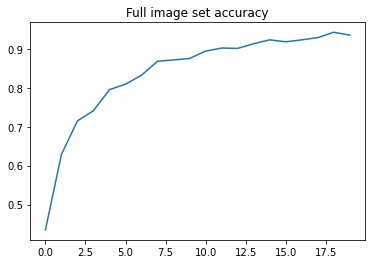

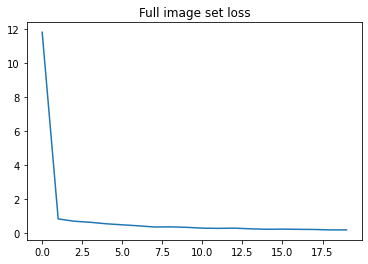

In [49]:
final_acc = final_history.history['accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
final_loss = final_history.history['loss']

# Get number of epochs
final_epochs = range(len(final_acc))

# Plot training and validation accuracy per epoch
plt.plot(final_epochs, final_acc)
plt.title('Full image set accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(final_epochs, final_loss)
plt.title('Full image set loss')

In [23]:
# predict the entire data set to see how the model predicts as a whole
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# filename = all_covid_dir + '\COVID-1' + '.png'
# img = load_img(filename, target_size=(299, 299))
# img = img_to_array(img)
# img = img.reshape(1, 299, 299, 3)
# img = img.astype('float32')
# print(final_model.predict(img)[0])
score = 0
# covid images first
for i in range(total_covid_files):
    filename = all_covid_dir + '\COVID-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_model.predict(img)[0]
    if prediction[0] == 1:
        score += 1
# normal images second
for i in range(total_normal_files):
    filename = all_normal_dir + '\\Normal-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_model.predict(img)[0]
    if prediction[1] == 1:
        score += 1
# pneumonia images third
for i in range(total_pneumonia_files):
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_model.predict(img)[0]
    if prediction[2] == 1:
        score += 1
        
accuracy = score/(total_covid_files + total_normal_files + total_pneumonia_files)
print("Final model accuracy: ", accuracy)
    

Final model accuracy:  0.8833894278360721


In [26]:
# begin model for binary classification
#sample images of each type to be split into training and validation sets
sample_size = 1000
train_ratio = 0.8

training_size = int(sample_size*train_ratio)
valid_size = sample_size - training_size

covid_train = list(np.random.choice(range(total_covid_files), sample_size, replace=False))
normal_train = list(np.random.choice(range(total_normal_files), sample_size, replace=False))
pneumonia_train = list(np.random.choice(range(total_pneumonia_files), sample_size, replace=False))
covid_valid = []
normal_valid = []
pneumonia_valid = []

for i in range(valid_size):
    covid_index = np.random.choice(covid_train)
    normal_index = np.random.choice(normal_train)
    pneumonia_index = np.random.choice(pneumonia_train)
    
    covid_valid.append(covid_index)
    covid_train.remove(covid_index)
    normal_valid.append(normal_index)
    normal_train.remove(normal_index)
    pneumonia_valid.append(pneumonia_index)
    pneumonia_train.remove(pneumonia_index)
    
for index in covid_train:
    filename = all_covid_dir + '\COVID-' + str(index+1) + '.png'
    copy(filename, binary_covid_train_dir)
    
for index in covid_valid:
    filename = all_covid_dir + '\COVID-' + str(index+1) + '.png'
    copy(filename, binary_covid_valid_dir)
    
for index in normal_train:
    filename = all_normal_dir + '\\Normal-' + str(index+1) + '.png'
    copy(filename, binary_non_covid_train_dir)
    
for index in normal_valid:
    filename = all_normal_dir + '\\Normal-' + str(index+1) + '.png'
    copy(filename, binary_non_covid_valid_dir)
    
for index in pneumonia_train:
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(index+1) + '.png'
    copy(filename, binary_non_covid_train_dir)
    
for index in pneumonia_valid:
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(index+1) + '.png'
    copy(filename, binary_non_covid_valid_dir)

In [31]:
# Image pre-processing
binary_train_datagen = ImageDataGenerator(rescale=1./255)
binary_val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
binary_train_generator = train_datagen.flow_from_directory(
        binary_train_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='binary')

# Flow validation images in batches using val_datagen generator
binary_validation_generator = val_datagen.flow_from_directory(
        binary_valid_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [33]:
# baseline binary CNN with no dropout
def build_binary_CNN():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(299, 299, 3)))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dense(1, activation='sigmoid'))
    cnn.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return cnn

binary_test_model = build_binary_CNN()

binary_history = binary_test_model.fit_generator(
    binary_train_generator, 
    steps_per_epoch=len(binary_train_generator),
    validation_data=binary_validation_generator, 
    validation_steps=len(binary_validation_generator), 
    epochs=20, 
    verbose=2)

Epoch 1/20
38/38 - 281s - loss: 1.5171 - accuracy: 0.7392 - val_loss: 0.3769 - val_accuracy: 0.8300
Epoch 2/20
38/38 - 274s - loss: 0.2574 - accuracy: 0.8958 - val_loss: 0.2308 - val_accuracy: 0.9083
Epoch 3/20
38/38 - 272s - loss: 0.1747 - accuracy: 0.9354 - val_loss: 0.2363 - val_accuracy: 0.9067
Epoch 4/20
38/38 - 272s - loss: 0.1296 - accuracy: 0.9533 - val_loss: 0.2143 - val_accuracy: 0.9217
Epoch 5/20
38/38 - 272s - loss: 0.0886 - accuracy: 0.9658 - val_loss: 0.2313 - val_accuracy: 0.9217
Epoch 6/20
38/38 - 271s - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.2244 - val_accuracy: 0.9267
Epoch 7/20
38/38 - 273s - loss: 0.0365 - accuracy: 0.9917 - val_loss: 0.2988 - val_accuracy: 0.9200
Epoch 8/20
38/38 - 267s - loss: 0.0395 - accuracy: 0.9854 - val_loss: 0.2969 - val_accuracy: 0.9183
Epoch 9/20
38/38 - 272s - loss: 0.0184 - accuracy: 0.9967 - val_loss: 0.3438 - val_accuracy: 0.9250
Epoch 10/20
38/38 - 272s - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.2916 - val_accuracy: 0.9300

Text(0.5, 1.0, 'Training and validation loss')

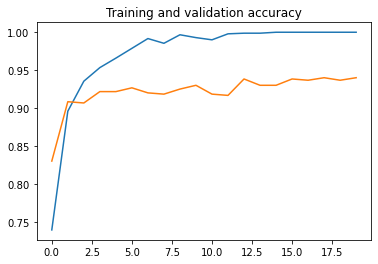

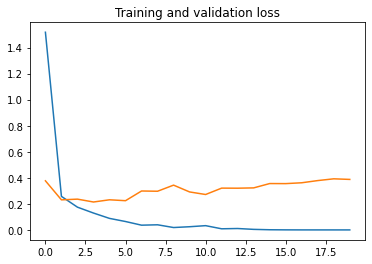

In [34]:
# plots for binary classification with no dropout

binary_acc = binary_history.history['accuracy']
binary_val_acc = binary_history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
binary_loss = binary_history.history['loss']
binary_val_loss = binary_history.history['val_loss']

# Get number of epochs
binary_epochs = range(len(binary_acc))

# Plot training and validation accuracy per epoch
plt.plot(binary_epochs, binary_acc)
plt.plot(binary_epochs, binary_val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(binary_epochs, binary_loss)
plt.plot(binary_epochs, binary_val_loss)
plt.title('Training and validation loss')


In [35]:
# binary classification with dropout regularization
def build_binary_dropout_CNN():
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(299, 299, 3)))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(1, activation='sigmoid'))
    cnn.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return cnn

binary_dropout_model = build_binary_CNN()

binary_dropout_history = binary_dropout_model.fit_generator(
    binary_train_generator, 
    steps_per_epoch=len(binary_train_generator),
    validation_data=binary_validation_generator, 
    validation_steps=len(binary_validation_generator), 
    epochs=20, 
    verbose=2)


Epoch 1/20
38/38 - 279s - loss: 2.0030 - accuracy: 0.7525 - val_loss: 0.3416 - val_accuracy: 0.8467
Epoch 2/20
38/38 - 274s - loss: 0.2662 - accuracy: 0.8863 - val_loss: 0.2338 - val_accuracy: 0.9050
Epoch 3/20
38/38 - 274s - loss: 0.2048 - accuracy: 0.9200 - val_loss: 0.2176 - val_accuracy: 0.9117
Epoch 4/20
38/38 - 268s - loss: 0.1161 - accuracy: 0.9583 - val_loss: 0.2002 - val_accuracy: 0.9200
Epoch 5/20
38/38 - 266s - loss: 0.0784 - accuracy: 0.9725 - val_loss: 0.1979 - val_accuracy: 0.9367
Epoch 6/20
38/38 - 265s - loss: 0.0539 - accuracy: 0.9804 - val_loss: 0.2193 - val_accuracy: 0.9233
Epoch 7/20
38/38 - 266s - loss: 0.0297 - accuracy: 0.9921 - val_loss: 0.2626 - val_accuracy: 0.9250
Epoch 8/20
38/38 - 267s - loss: 0.0226 - accuracy: 0.9933 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 9/20
38/38 - 267s - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.2042 - val_accuracy: 0.9433
Epoch 10/20
38/38 - 268s - loss: 0.0760 - accuracy: 0.9704 - val_loss: 0.3084 - val_accuracy: 0.8950

Text(0.5, 1.0, 'Training and validation loss')

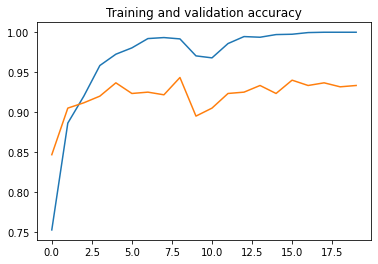

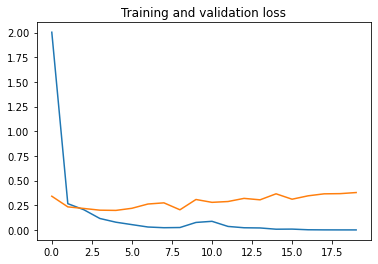

In [37]:
# plots for binary classification with droput regularization
binary_dropout_acc = binary_dropout_history.history['accuracy']
binary_dropout_val_acc = binary_dropout_history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
binary_dropout_loss = binary_dropout_history.history['loss']
binary_dropout_val_loss = binary_dropout_history.history['val_loss']

# Get number of epochs
binary_dropout_epochs = range(len(binary_dropout_acc))

# Plot training and validation accuracy per epoch
plt.plot(binary_dropout_epochs, binary_dropout_acc)
plt.plot(binary_dropout_epochs, binary_dropout_val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(binary_dropout_epochs, binary_dropout_loss)
plt.plot(binary_dropout_epochs, binary_dropout_val_loss)
plt.title('Training and validation loss')

In [40]:
# final binary model fit on entire set
final_binary_datagen = ImageDataGenerator(rescale=1./255)

final_binary_generator = final_binary_datagen.flow_from_directory(
        finalize_binary_dir,
        target_size=(299, 299),
        batch_size=64,
        class_mode='binary')

final_binary = build_binary_dropout_CNN()
final_binary_history = final_binary.fit_generator(
    final_binary_generator, 
    steps_per_epoch=len(final_binary_generator), 
    epochs=20, 
    verbose=2)

Found 3000 images belonging to 2 classes.
Epoch 1/20
47/47 - 386s - loss: 6.6516 - accuracy: 0.6320
Epoch 2/20
47/47 - 368s - loss: 0.4960 - accuracy: 0.7157
Epoch 3/20
47/47 - 364s - loss: 0.4133 - accuracy: 0.7827
Epoch 4/20
47/47 - 373s - loss: 0.3557 - accuracy: 0.8313
Epoch 5/20
47/47 - 376s - loss: 0.3064 - accuracy: 0.8660
Epoch 6/20
47/47 - 362s - loss: 0.2692 - accuracy: 0.8803
Epoch 7/20
47/47 - 364s - loss: 0.2595 - accuracy: 0.8947
Epoch 8/20
47/47 - 366s - loss: 0.2190 - accuracy: 0.9133
Epoch 9/20
47/47 - 377s - loss: 0.1965 - accuracy: 0.9207
Epoch 10/20
47/47 - 375s - loss: 0.2008 - accuracy: 0.9130
Epoch 11/20
47/47 - 372s - loss: 0.1980 - accuracy: 0.9160
Epoch 12/20
47/47 - 374s - loss: 0.1511 - accuracy: 0.9407
Epoch 13/20
47/47 - 376s - loss: 0.1464 - accuracy: 0.9433
Epoch 14/20
47/47 - 381s - loss: 0.1438 - accuracy: 0.9413
Epoch 15/20
47/47 - 376s - loss: 0.1347 - accuracy: 0.9487
Epoch 16/20
47/47 - 376s - loss: 0.1311 - accuracy: 0.9503
Epoch 17/20
47/47 - 373

Text(0.5, 1.0, 'Full image set loss')

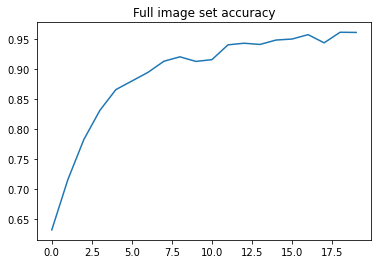

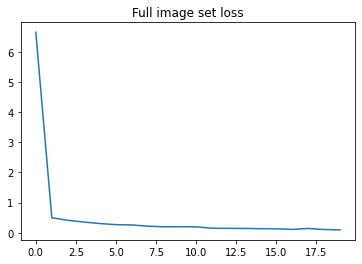

In [48]:
final_binary_acc = final_binary_history.history['accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
final_binary_loss = final_binary_history.history['loss']

# Get number of epochs
final_binary_epochs = range(len(final_binary_acc))

# Plot training and validation accuracy per epoch
plt.plot(final_binary_epochs, final_binary_acc)
plt.title('Full image set accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(final_binary_epochs, final_binary_loss)
plt.title('Full image set loss')

In [43]:
filename = all_covid_dir + '\COVID-1' + '.png'
img = load_img(filename, target_size=(299, 299))
img = img_to_array(img)
img = img.reshape(1, 299, 299, 3)
img = img.astype('float32')
print(final_binary.predict(img))

[[0.]]


In [44]:
score = 0
# covid images first
for i in range(total_covid_files):
    filename = all_covid_dir + '\COVID-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_binary.predict(img)[0]
    if prediction[0] == 0:
        score += 1
# normal images second
for i in range(total_normal_files):
    filename = all_normal_dir + '\\Normal-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_binary.predict(img)[0]
    if prediction[0] == 1:
        score += 1
# pneumonia images third
for i in range(total_pneumonia_files):
    filename = all_pneumonia_dir + '\Viral Pneumonia-' + str(i+1) + '.png'
    img = load_img(filename, target_size=(299, 299))
    img = img_to_array(img)
    img = img.reshape(1, 299, 299, 3)
    img = img.astype('float32')
    prediction = final_binary.predict(img)[0]
    if prediction[0] == 1:
        score += 1
        
accuracy = score/(total_covid_files + total_normal_files + total_pneumonia_files)
print("Final binary model accuracy: ", accuracy)

Final binary model accuracy:  0.9029235134956775
